In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataa = load_breast_cancer()


df = pd.DataFrame(dataa.data, columns=dataa.feature_names)
df['target'] = dataa.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

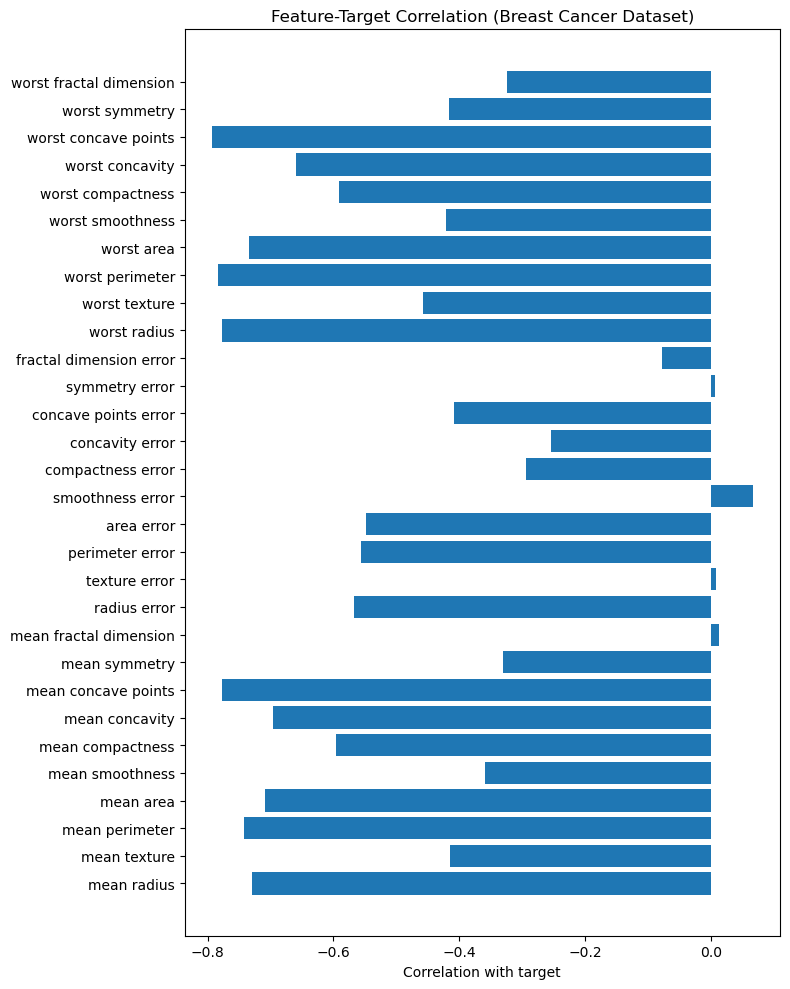

In [2]:
import matplotlib.pyplot as plt

# Calculate corr with target
corr_with_target = df.corr(numeric_only=True)['target'].drop('target')

print(corr_with_target)

# Making bar graph
plt.figure(figsize=(8,10))
plt.barh(corr_with_target.index, corr_with_target.values)
plt.xlabel('Correlation with target')
plt.title("Feature-Target Correlation (Breast Cancer Dataset)")
plt.tight_layout()
plt.show()
    

In [9]:
# Features corr value sort and decending(5)
top_features = corr_with_target.abs().sort_values(ascending=False).head(5)
print("Top features:\n", top_features) 

Top features:
 worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
Name: target, dtype: float64


In [4]:
data = df[dataa.feature_names].values # shape: (N,30)
labels = df['target'].values.reshape(-1,1) # shape: (N,1)

print(f"Data shape:        {data.shape}")
print(f"Lables shape:      {labels.shape}")

Data shape:        (569, 30)
Lables shape:      (569, 1)


In [13]:
# Convert the numpy arrays to PyTorch
import torch
data_torch = torch.tensor(dataa.data, dtype=torch.float32)
labels_torch = torch.tensor(dataa.target, dtype=torch.float32).unsqueeze(1)
data_length = len(data_torch)
split_length = int(0.8*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]

val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape)

torch.Size([455, 30]) torch.Size([455, 1])


In [ ]:
g = torch.Generator().manual_seed(404)

